In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/telecom_customer_churn.csv')
url = "https://raw.githubusercontent.com/tanqing2001/datafile/main/telecom_customer_churn.csv"
df = pd.read_csv(url)
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [22]:
pd.set_option('display.max_columns', None)
df.head()

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Churned,Stayed,Contract_Monthly,Contract_OneYear,Contract_TwoYear
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,False,True,False,True,False
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,False,True,True,False,False
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,True,False,True,False,False
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,True,False,True,False,False
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,True,False,True,False,False


In [3]:
# data fram size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
#replacing the space of the columns names by _
df.columns = df.columns.str.replace(' ', '_')
# test if replacing is done
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [6]:
# Delete all records where 'customer_status' is 'Joined' as we are only concerned on 'Stayed' and 'Churned'
df = df[df['Customer_Status'] != 'Joined']


# getting dummy variables for the Customer_Status column
df[["Churned","Stayed"]]= pd.get_dummies(df.Customer_Status)

df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason',
       'Churned', 'Stayed'],
      dtype='object')

In [7]:
# Getting dummy variables for Contract column
df[["Month-to-Month","One year","Two Year"]]= pd.get_dummies(df.Contract)

#Renaming dummy columns for contract
df.rename(columns={'Month-to-Month': 'Contract_Monthly'}, inplace=True)
df.rename(columns={'One year': 'Contract_OneYear'}, inplace=True)
df.rename(columns={'Two Year': 'Contract_TwoYear'}, inplace=True)

df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason',
       'Churned', 'Stayed', 'Contract_Monthly', 'Contract_OneYear',
       'Contract_TwoYear'],
      dtype='object')

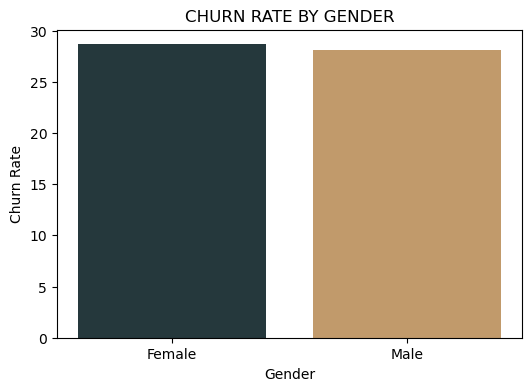

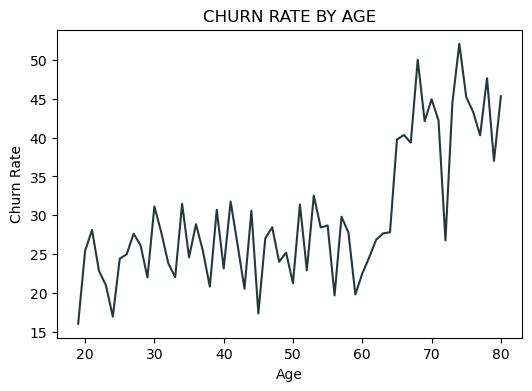

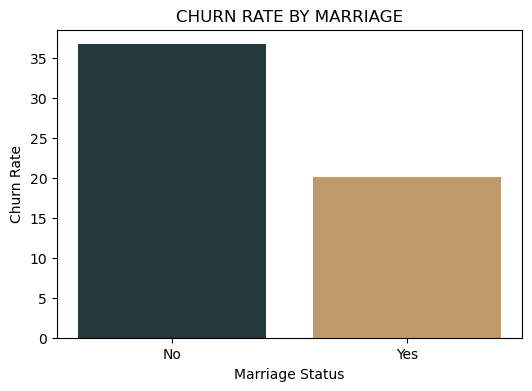

In [24]:
churn_by_gender = df.groupby('Gender')['Customer_Status'].apply(lambda x: (x == 'Churned').mean()*100)
churn_by_age = df.groupby('Age')['Customer_Status'].apply(lambda x: (x == 'Churned').mean() * 100)
churn_by_marriage = df.groupby('Married')['Customer_Status'].apply(lambda x: (x == 'Churned').mean()*100)

plt.rcParams["figure.figsize"] = (6,4)
# Visualize the churn_by_gender
plt.bar(churn_by_gender.index, churn_by_gender, color=['#25383C', '#C19A6B'])
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY GENDER')
plt.show()

# Visualize the churn_by_age
plt.plot(churn_by_age.index, churn_by_age, color='#25383C')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY AGE')
plt.show()

#Visualize the churn rate according to marriage status
plt.bar(churn_by_marriage.index, churn_by_marriage, color=['#25383C', '#C19A6B'])
plt.xlabel('Marriage Status')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY MARRIAGE')
plt.show()

In [9]:
#counting values of the customer status

counts_Customer_Status = df.Customer_Status.value_counts()
counts_Customer_Status

Customer_Status
Stayed     4720
Churned    1869
Name: count, dtype: int64

In [18]:
# Plotting Customer status
def pie(pie_data, mycolors, title):
    plt.title(title)
    plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= ['#C0C0C0', '#C19A6B'])

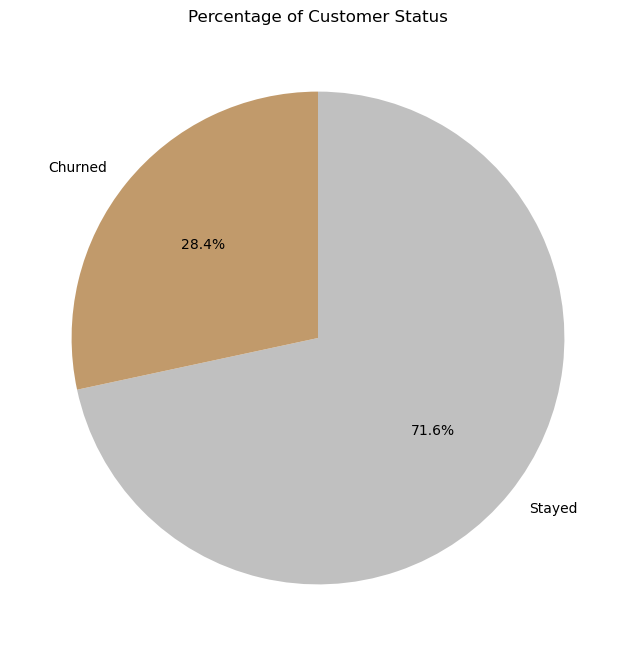

In [20]:
pie(counts_Customer_Status, mycolors, "Percentage of Customer Status")

#### We can check the impact of the total amount of months that the customer has been with the company on the churning of the clients ####

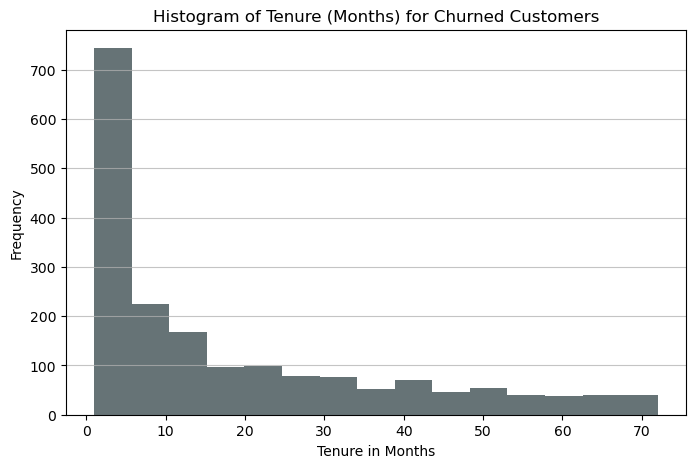

In [25]:
# Filter for churned customers
churned_customers = df[df['Churned'] == True]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(churned_customers['Tenure_in_Months'], bins=15, color='#25383C', alpha=0.7)
plt.title('Histogram of Tenure (Months) for Churned Customers')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha = 0.75)
plt.show()

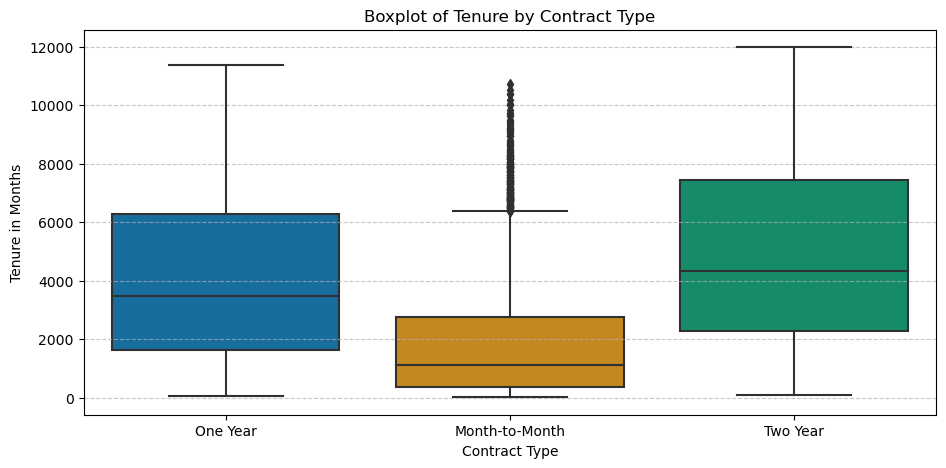

In [31]:
# Plot the boxplot for contract types
plt.figure(figsize=(11, 5))
sb.boxplot(data=df, x='Contract', y='Total_Revenue', palette = 'colorblind')
plt.title('Boxplot of Tenure by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Tenure in Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

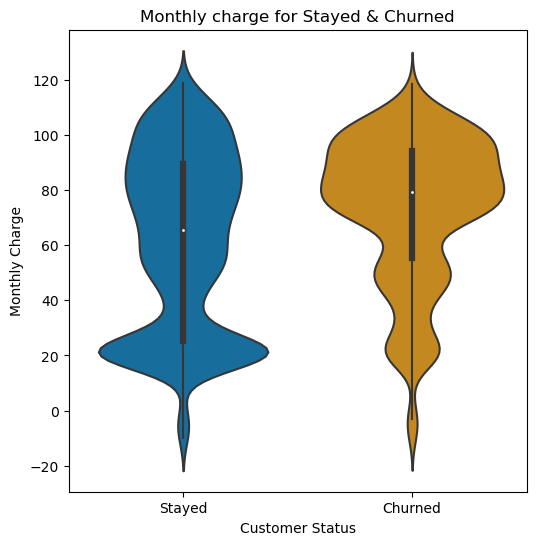

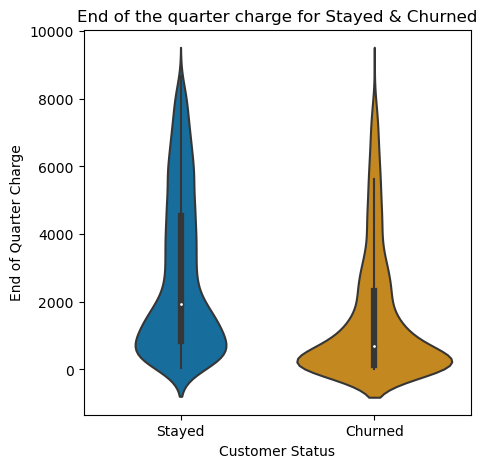

In [35]:
# Plot the Violin plot for monthly charge for Stayed and Churned customers
plt.figure(figsize=(13, 6))
plt.subplot(1,2,1)
sb.violinplot(data=df, x='Customer_Status', y='Monthly_Charge', palette = 'colorblind')
plt.title("Monthly charge for Stayed & Churned")
plt.xlabel('Customer Status')
plt.ylabel('Monthly Charge')
plt.show()

plt.subplot(1,2,2)
sb.violinplot(data=df, x='Customer_Status', y='Total_Charges', palette = 'colorblind')
plt.title("End of the quarter charge for Stayed & Churned")
plt.xlabel('Customer Status')
plt.ylabel('End of Quarter Charge')
plt.show()


In [36]:
model_db = df.iloc[:, [1, 2, 3, 4, 10, 12, 13, 14, 15, 17, 22,23,24, 25, 27, 29, 30, 38,39,40,41]]
model_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number_of_Dependents               6589 non-null   int64  
 4   Tenure_in_Months                   6589 non-null   int64  
 5   Phone_Service                      6589 non-null   object 
 6   Avg_Monthly_Long_Distance_Charges  5945 non-null   float64
 7   Multiple_Lines                     5945 non-null   object 
 8   Internet_Service                   6589 non-null   object 
 9   Avg_Monthly_GB_Download            5245 non-null   float64
 10  Streaming_TV                       5245 non-null   object 
 11  Streaming_Movies                   5245 non-null   object 
 1

**Logistic Regression Analysis**

In [37]:
model_db1 = df.iloc[:, [1, 2, 3, 4, 10, 12, 13, 14, 15, 17, 22,23,24, 25, 27, 28, 29, 30, 38, 40, 41, 42]]
model_db1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number_of_Dependents               6589 non-null   int64  
 4   Tenure_in_Months                   6589 non-null   int64  
 5   Phone_Service                      6589 non-null   object 
 6   Avg_Monthly_Long_Distance_Charges  5945 non-null   float64
 7   Multiple_Lines                     5945 non-null   object 
 8   Internet_Service                   6589 non-null   object 
 9   Avg_Monthly_GB_Download            5245 non-null   float64
 10  Streaming_TV                       5245 non-null   object 
 11  Streaming_Movies                   5245 non-null   object 
 1

**Managing Null**

In [38]:
#Checking missing values
model_db1.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number_of_Dependents                    0
Tenure_in_Months                        0
Phone_Service                           0
Avg_Monthly_Long_Distance_Charges     644
Multiple_Lines                        644
Internet_Service                        0
Avg_Monthly_GB_Download              1344
Streaming_TV                         1344
Streaming_Movies                     1344
Streaming_Music                      1344
Unlimited_Data                       1344
Paperless_Billing                       0
Payment_Method                          0
Monthly_Charge                          0
Total_Charges                           0
Churned                                 0
Contract_Monthly                        0
Contract_OneYear                        0
Contract_TwoYear                        0
dtype: int64

The fields Avg_Monthly_Long_Distance_Charges, Multiple_Lines, Avg_Monthly_GB_Download, Streaming_TV, Streaming_Movies, Streaming_Music and  Unlimited_Data has a good number of nulls. Deleting these records would be a loss of data considering the number of records. Hence we will have to manage these data.
 - For multiple lines the data would not have been provided because they did not have multiple lines. Hence replace it with 'No'
 - For Avg_Monthly_GB_Download, the missing data could be because they did not have any. So replacing it with 0.
 - For all other columns being Yes/No field, the missing value could be because they did not have that option available. Hence filling it with 'No'

In [39]:
missingvalue_replacements = {'Multiple_Lines': 'No', 'Avg_Monthly_GB_Download': 0.0,
                             'Avg_Monthly_Long_Distance_Charges': 0.0,'Streaming_TV': 'No','Streaming_Movies': 'No',
                             'Streaming_Music': 'No','Unlimited_Data': 'No'}
model_df = model_db1.fillna(missingvalue_replacements)

#We assume that the negative values in the Monthly charge variable are erroneous.
model_df = model_df[model_df['Monthly_Charge'] >= 0]

In [40]:
model_df.shape

(6475, 22)

In [41]:
import seaborn as sns

In [42]:
cols = ['Contract_Monthly', 'Tenure_in_Months', 'Contract_TwoYear','Number_of_Dependents','Contract_OneYear',
        'Monthly_Charge', 'Age','Avg_Monthly_GB_Download', 'Avg_Monthly_Long_Distance_Charges','Total_Charges',]


**Data Pre-processing**

In [43]:
# Taking a copy of file for SMOTE
model_smote = model_df.copy()
model_smote

,Gender,Age,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Avg_Monthly_GB_Download,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Churned,Contract_Monthly,Contract_OneYear,Contract_TwoYear
0,Female,37,Yes,0,9,Yes,42.39,No,Yes,16.0,Yes,No,No,Yes,Yes,Credit Card,65.60,593.30,False,False,True,False
2,Male,50,No,0,4,Yes,33.65,No,Yes,30.0,No,No,No,Yes,Yes,Bank Withdrawal,73.90,280.85,True,True,False,False
3,Male,78,Yes,0,13,Yes,27.82,No,Yes,4.0,Yes,Yes,No,Yes,Yes,Bank Withdrawal,98.00,1237.85,True,True,False,False
4,Female,75,Yes,0,3,Yes,7.38,No,Yes,11.0,Yes,No,No,Yes,Yes,Credit Card,83.90,267.40,True,True,False,False
5,Female,23,No,3,9,Yes,16.77,No,Yes,73.0,Yes,Yes,Yes,Yes,Yes,Credit Card,69.40,571.45,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,4,Yes,2.01,No,No,0.0,No,No,No,No,No,Bank Withdrawal,20.95,85.50,True,True,False,False
7038,Female,20,No,0,13,Yes,46.68,No,Yes,59.0,No,No,Yes,Yes,No,Credit Card,55.15,742.90,False,False,True,False
7039,Male,40,Yes,0,22,Yes,16.20,Yes,Yes,17.0,No,Yes,Yes,Yes,Yes,Bank Withdrawal,85.10,1873.70,True,True,False,False
7041,Male,21,Yes,0,67,Yes,2.12,No,Yes,58.0,No,Yes,Yes,Yes,No,Credit Card,67.85,4627.65,False,False,False,True


Replacing the Gender column in the dataset with Label Encoding; 0 for Female; 1 for Male

In [44]:
#Replacing gender column with numnerical value, 0 for female and 1 for male
model_df.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

#Replacing the columns with 'yes' and 'no' output by Label Encoding; 0 for No; 1 for Yes

yes_and_no = ['Married', 'Phone_Service', 'Multiple_Lines', 'Internet_Service','Streaming_TV', 'Streaming_Movies',
              'Streaming_Music']

for i in yes_and_no:
    model_df.replace({'No':0,'Yes':1},inplace=True)

#Getting dummy variables for other categorical column
model_df = pd.get_dummies(data = model_df, columns=['Payment_Method'], drop_first = True)

**Correlation Matrix**

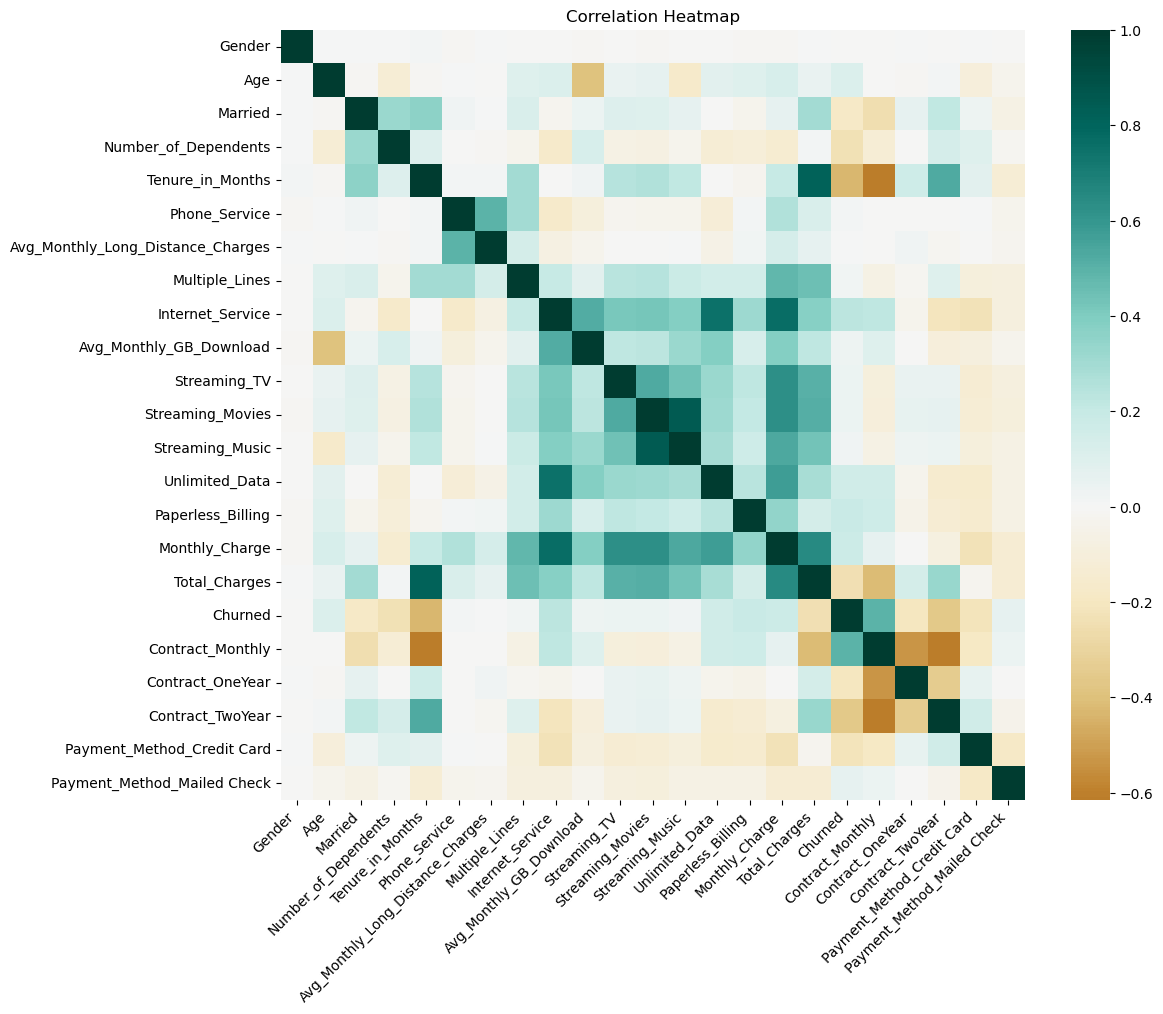

In [71]:
#Correlation matrix for all columns
corr_matrix = model_df.corr()
corr_matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = False, cmap = 'BrBG', center = 0)
plt.title('Correlation Heatmap')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

As it is observed from the heatmap:
- The 5 most important numerical features related to 'Churned' field are 'Contract_Monthly', 'Tenure_in_Months', 'Contract_TwoYear', 'Number_of_Dependents', and 'Internet_Service'.

**Feature selection through Recursive Feature Elimination Method**

In [58]:
#Defining data for RFE

X_selection = model_df.drop('Churned',axis=1)
y_selection = model_df['Churned']

#Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Feature extraction
model = LogisticRegression()
rfe = RFE(estimator =  model, n_features_to_select = 15, step=1)
fit = rfe.fit(X_selection, y_selection)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Num Features: 15
Selected Features: [False False  True  True  True  True False  True  True False False  True
  True  True  True False False  True  True  True  True  True]
Feature Ranking: [3 4 1 1 1 1 6 1 1 7 5 1 1 1 1 2 8 1 1 1 1 1]


/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

As seen from RFE, the best 15 features selected by RFE method is: Married, Number_of_Dependents, Tenure_in_Months, Phone_Service, Multiple_Lines, Internet_Service, Streaming_Movies, Streaming_Music, Unlimited_Data, Paperless_Billing, Contract_Monthly, Contract_OneYear, Contract_TwoYear, Payment_Method_Credit Card, Payment_Method_Mailed Check.

In [59]:
# Data Set splitting
from sklearn.model_selection import train_test_split
column_to_drop = ['Gender', 'Age', 'Avg_Monthly_Long_Distance_Charges', 'Avg_Monthly_GB_Download', 'Streaming_TV',
                 'Monthly_Charge', 'Churned','Contract_Monthly']
X = model_df.drop(column_to_drop, axis=1)
y = model_df['Churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 149)

#Print
print('The size of the training set predictors is ', X_train.shape)
print('The size of the training set response is ', y_train.shape)
print('The size of the test set predictors is ', X_test.shape)
print('The size of the test set response is ', y_test.shape)

The size of the training set predictors is  (5180, 15)
The size of the training set response is  (5180,)
The size of the test set predictors is  (1295, 15)
The size of the test set response is  (1295,)


**Standardization of numeric variables**

In [60]:
# Standardizing numeric columns
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_cols = ['Tenure_in_Months','Number_of_Dependents','Total_Charges']
X_train[num_cols] = std_scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = std_scaler.transform(X_test[num_cols])

**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score

In [62]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [63]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89       927
        True       0.72      0.72      0.72       368

    accuracy                           0.84      1295
   macro avg       0.80      0.80      0.80      1295
weighted avg       0.84      0.84      0.84      1295



In [64]:
#f1 Score of Churned prediction, Churned = 1
f1 = f1_score(y_test,y_pred,average = None).round(2)[1]

print("F1 Score:", f1)

F1 Score: 0.72


Logistic regression applied on the cleaned dataset not augmented by feature engineering has provided an f1-score for the Churned (which is the one we are most interested in) category equal to 0.72

In [65]:
#Precision for Churned Class
precision = precision_score(y_test,y_pred,average = None).round(2)[1]
print("Precision:", precision)

Precision: 0.72


In [66]:
#Recall for Churned class
recall = recall_score(y_test,y_pred,average = None).round(2)[1]
print("Recall:", recall)

Recall: 0.72


In [67]:
#Confusion Matrix
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
conf_matrix

Predicted,False,True
Real,,
False,0.885653,0.114347
True,0.277174,0.722826


<Axes: xlabel='Predicted', ylabel='Real'>

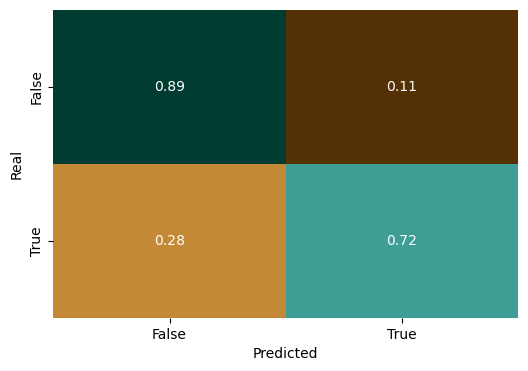

In [70]:
#Plotting Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, fmt='.2f', annot=True,cmap = "BrBG", cbar=False)

As observed from the confusion matrix, 72% of the actual churned class is predicted correctly and 28% of actually churned data is predicted as not churned.

**Gain Chart**

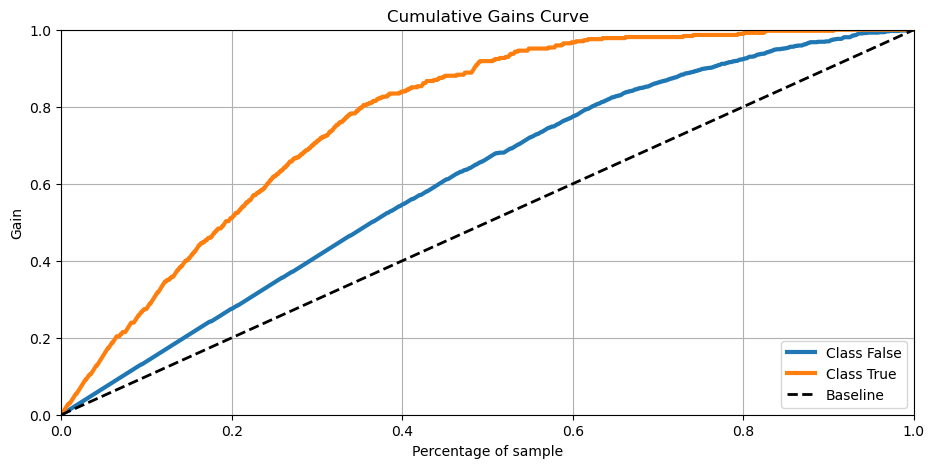

In [72]:

# The usual train-test split mumbo-jumbo
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt

nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

The Greater the area, the Better the model. We could see that our model is good in prediction because the chart has shown that the model allowed a greater Gain for Class 1 than the baseline. Business-wise, the churn is found better with using the model; means fewer resources to spend.

**Feature Importance**

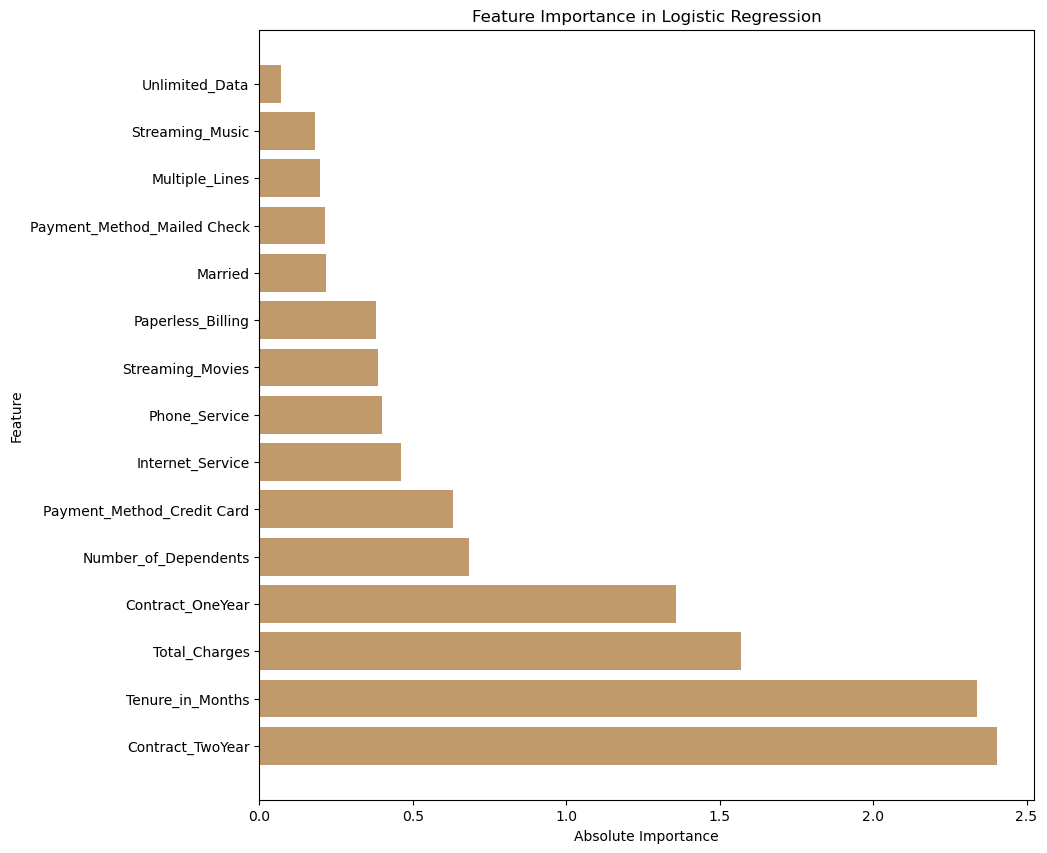

In [73]:
#Column names of X_train
feature_names = X_train.columns
# Extract feature coefficients
coefficients = logreg.coef_[0]

# Calculate absolute feature importance
abs_importance = np.abs(coefficients)

# Create a DataFrame with feature names and their absolute importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
bar_color = '#C19A6B'

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color)
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

**Summary of Logistic Regression Model**

In [74]:
import statsmodels.api as sm

X1 = sm.add_constant(X)

X1 = sm.add_constant(np.asarray(X).astype(float))  # Ensure X1 is a NumPy array of float type
y = np.asarray(y).astype(float)  

log_clf =sm.Logit(y,X1)

classifier = log_clf.fit()

ypred = classifier.predict(X1)

print(classifier.summary2())

Optimization terminated successfully.
         Current function value: 0.372350
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.376    
Date:               2025-01-03 02:45 AIC:              4853.9307
No. Observations:   6475             BIC:              4962.3420
Df Model:           15               Log-Likelihood:   -2411.0  
Df Residuals:       6459             LL-Null:          -3863.7  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    0.7381     0.2230     3.3102   0.0009    0.3011    1.1752
x1       0.2335     0.0804     2.9055   0.0037    0.0760    0.3910
x2 

As observed from the summary of Logistic Regression,
1. The features such as Age, Married, Number_of_Dependents, Tenure_in_Months, Multiple Lines, Internet Service, Paperless Billing, Total_Charges, Contract_OneYear, Contract_TwoYear, Payment_Method_Credit Card etc. are significant as per z test and its p-value.
2. The model also conveys that the odd of customer churn are dependent on the features mentioned above which are significant as per p-value considering 5% significance level.
3. Most of the features mentioned here aligns with our correlation or RFE results which selected the most important features.
4. A one-unit increase in the predictor variable is associated with an increase in the odds of the outcome variable. For example, a unit increase in No.of Dependents will additively decrease the log odds of churn rate by 0.7346, or multiplicatively change the odds by exponential(-0.7346) = 0.4796973 times or odds of churn decreases by 52%.

**Cross Validation**

In [75]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [76]:
#Finding stratified cross validation
cv_score_lr = cross_val_score(logreg, X, y, cv = 5)

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [77]:
print(cv_score_lr)

[0.81389961 0.82625483 0.83011583 0.82084942 0.84324324]


As seen from the result, [0.81776062 0.82548263 0.83011583 0.82084942 0.84324324] these are the accuracies obtained in each train-test split. We provided cv = 5, and hence we have 5 split and accuracies. We will have to find the mean of these accuracies to obtain the accuracy after cross- validation.

In [78]:
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = round((mean_accuracy_lr *100),2)
print('The accuracy after cross-validation: ',mean_accuracy_lr)

The accuracy after cross-validation:  82.69


The accuracy after cross-validation:  82.76

**Hyperparameter Tuning - GridSearchCV**

Grid searchCV is used to find the best parameters for our model

In [79]:
from sklearn.model_selection import GridSearchCV

#Defining parameters
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : [1,5,10,20],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'class_weight': [{0: 1, 1: 5}]

    }

In [80]:
# Grid Search
classifier = GridSearchCV(logreg, parameters, cv = 5)

In [81]:
# Fitting the data to the model
classifier.fit(X, y)

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/skl

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 20], 'class_weight': [{0: 1, 1: 5}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [82]:
# Printing the best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [83]:
# Highest Accuracy
highest_accuracy = classifier.best_score_
highest_accuracy

0.7368339768339769

In [84]:
#Loading the results to panda Dataframe
result = pd.DataFrame(classifier.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000989,9.333667e-04,0.000000,0.000000,1,"{0: 1, 1: 5}",l1,lbfgs,"{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
1,0.000392,5.892970e-05,0.000000,0.000000,1,"{0: 1, 1: 5}",l1,newton-cg,"{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
2,0.067352,9.327646e-03,0.001311,0.000496,1,"{0: 1, 1: 5}",l1,liblinear,"{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalt...",0.732046,0.73668,0.720463,0.727413,0.756757,0.734672,0.012274,12
3,0.000270,1.795062e-05,0.000000,0.000000,1,"{0: 1, 1: 5}",l1,sag,"{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
4,0.094223,6.259564e-03,0.001577,0.001110,1,"{0: 1, 1: 5}",l1,saga,"{'C': 1, 'class_weight': {0: 1, 1: 5}, 'penalt...",0.655598,0.66332,0.643243,0.686486,0.664865,0.662703,0.014141,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000236,4.732474e-06,0.000000,0.000000,20,"{0: 1, 1: 5}",none,lbfgs,"{'C': 20, 'class_weight': {0: 1, 1: 5}, 'penal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
76,0.000230,3.989506e-07,0.000000,0.000000,20,"{0: 1, 1: 5}",none,newton-cg,"{'C': 20, 'class_weight': {0: 1, 1: 5}, 'penal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
77,0.000230,1.761073e-06,0.000000,0.000000,20,"{0: 1, 1: 5}",none,liblinear,"{'C': 20, 'class_weight': {0: 1, 1: 5}, 'penal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
78,0.000233,3.570234e-06,0.000000,0.000000,20,"{0: 1, 1: 5}",none,sag,"{'C': 20, 'class_weight': {0: 1, 1: 5}, 'penal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [85]:
grid_search_result = result[['param_C','param_penalty','param_solver', 'mean_test_score']]
grid_search_result

,param_C,param_penalty,param_solver,mean_test_score
0,1,l1,lbfgs,NaN
1,1,l1,newton-cg,NaN
2,1,l1,liblinear,0.734672
3,1,l1,sag,NaN
4,1,l1,saga,0.662703
...,...,...,...,...
75,20,none,lbfgs,NaN
76,20,none,newton-cg,NaN
77,20,none,liblinear,NaN
78,20,none,sag,NaN


As you can see the hyper parameter tuning selected C': 1, 'penalty': 'l2', 'lbfgs': 'liblinear' as best parameters. Now we apply these parameters to our baseline model and see how that improves the performance metrics.

In [86]:
#Applying hypertuned parameters to the model
logreg = LogisticRegression(penalty = 'l2', class_weight = {0: 1, 1: 2.5}, C = 5, solver = 'lbfgs')

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [87]:
#f1 Score of Churned prediction, Churned = 1
f_score = f1_score(y_test,y_pred,average = None).round(2)[1]

print("The F1 Score is:", f_score)

The F1 Score is: 0.72


In [88]:
acc = accuracy_score(y_test,y_pred)
acc

0.8123552123552124

In [89]:
#Precision for Churned Class
prec = precision_score(y_test,y_pred,average = None).round(2)[1]
print("The Precision is:", prec)

The Precision is: 0.62


In [90]:
#Recall for Churned class
rec = recall_score(y_test,y_pred,average = None).round(2)[1]
print("The Recall is:", rec)

The Recall is: 0.86


Looking at the performance metrics,
1. The hyper-tuned model has an accuracy of 81%, a little less than the baseline model, but still a good number. This could be because the hypertuned model takes the data imbalance into consideration and hence shows a more accurate accuracy than the baseline model, where the data imbalance is evident.
2. The precision is remarkably lesser than the baseline model around 62%
3. The Recall however is 86% evidently very high which is really good for our churned class prediction.It increased from 75% to 86% after hypertuning.

As we are more interested in detecting people which are about to churn the company, we wanted to increase the recall of the churned class. Apart from Hypertuning we are trying out Oversampling technique to see if that efficiently manages the data imbalance.

**Handling Data Imbalance**

In [91]:
#Performing Feature Engineering
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
def eng_df():
    df_eng = model_smote.copy()
    df_eng['AgeRange'] = pd.cut(df_eng['Age'],bins, labels = names,include_lowest = True).astype('object')
    df_eng['is_loyal'] = np.where(df_eng['Tenure_in_Months'] >= 30, 'Yes','No')
    df_eng['Dependents_cat'] = np.where(df_eng['Number_of_Dependents'] == 0,'No','Yes')

    return df_eng

df_eng = eng_df()

In [92]:
df_smote = eng_df()

In [93]:
#Splitting data
column_drop = ['Gender', 'Age', 'Avg_Monthly_Long_Distance_Charges', 'Avg_Monthly_GB_Download', 'Streaming_TV',
                 'Monthly_Charge', 'Churned','Contract_Monthly']
X1 = df_smote.drop(column_drop, axis = 1)
y1 = df_smote['Churned']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2,stratify = y1,random_state = 123)

In [94]:
# Define x_train and y_train for Smote
y_train_sm = y1_train
X_train_sm = X1_train

In [95]:
#Applying SMOTE

import sklearn
import imblearn
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features = (X_train_sm.dtypes == "object").values,random_state = 531)

X1_train, y1_train = smote.fit_resample(X_train_sm, y_train_sm)

/Users/roopeshraveendran/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.categorical_features == "auto":


In [96]:
y1_train.value_counts()

Churned
False    3709
True     3709
Name: count, dtype: int64

**Performing data pre-processing**

In [97]:
#Replacing gender column with numnerical value, 0 for female and 1 for male
X1_train.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
X1_test.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

In [98]:
# Replacing all yes_no columns with 1 and 0
yes_and_no = ['Married', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Streaming_Movies', 'Streaming_Music',
              'Unlimited_Data','Paperless_Billing','Dependents_cat','is_loyal']

for i in yes_and_no:
    X1_train.replace({'No':0,'Yes':1},inplace=True)
    X1_test.replace({'No':0,'Yes':1},inplace=True)

In [99]:
#Getting dummy variables for other categorical column
X1_train = pd.get_dummies(data = X1_train, columns=['Payment_Method'], drop_first = True)
X1_test = pd.get_dummies(data = X1_test, columns=['Payment_Method'],  drop_first = True)


In [100]:
#Converting categorical field Age Range to numerical ordinal value
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
ord_encoder = OrdinalEncoder()
X1_train[['AgeRange']] = ord_encoder.fit_transform(X1_train[['AgeRange']])
X1_test[['AgeRange']] = ord_encoder.transform(X1_test[['AgeRange']])

In [101]:
# Standardizing numeric columns
std_scaler = StandardScaler()
X1_train[num_cols] = std_scaler.fit_transform(X1_train[num_cols])
X1_test[num_cols] = std_scaler.transform(X1_test[num_cols])

In [102]:
X1_train

,Married,Number_of_Dependents,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Streaming_Movies,Streaming_Music,Unlimited_Data,Paperless_Billing,Total_Charges,Contract_OneYear,Contract_TwoYear,AgeRange,is_loyal,Dependents_cat,Payment_Method_Credit Card,Payment_Method_Mailed Check
0,0,-0.404988,-1.072726,1,0,0,0,0,0,1,-0.960524,False,False,2.0,0,0,True,False
1,1,-0.404988,0.267065,1,1,1,1,1,1,1,0.581754,False,False,2.0,1,0,False,False
2,0,-0.404988,-0.612172,1,0,0,0,0,0,0,-0.850415,False,False,1.0,0,0,True,False
3,1,-0.404988,0.978829,1,1,1,1,0,1,1,1.492562,False,False,3.0,1,0,False,False
4,1,-0.404988,1.774330,0,0,1,1,1,1,1,1.175095,False,True,2.0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,1,-0.404988,-0.319093,1,1,1,1,1,1,1,-0.129515,False,False,3.0,0,0,False,False
7414,1,0.776373,-0.863383,1,0,1,1,0,1,1,-0.603227,False,False,3.0,0,0,False,False
7415,0,-0.404988,0.936961,1,1,1,1,1,1,1,0.973270,True,False,3.0,1,0,False,False
7416,1,-0.404988,0.811355,1,1,1,1,1,1,1,1.281337,False,False,0.0,1,0,False,False


In [103]:
#Logistic Regression
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X1_train,y1_train)
y1_pred = lgr.predict(X1_test)

In [104]:
#Classification Report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

       False       0.90      0.80      0.85       927
        True       0.61      0.79      0.69       368

    accuracy                           0.80      1295
   macro avg       0.76      0.79      0.77      1295
weighted avg       0.82      0.80      0.80      1295



In [105]:
#f1 Score of Churned prediction, Churned = 1
f2 = f1_score(y1_test,y1_pred,average = None).round(2)[1]

print("The F1 Score is:", f2)

The F1 Score is: 0.69


In [106]:
#Precision for Churned Class
precision1 = precision_score(y1_test,y1_pred,average = None).round(2)[1]
print("The Precision is:", precision1)

The Precision is: 0.61


In [107]:
#Recall for Churned class
recall1 = recall_score(y1_test,y1_pred,average = None).round(2)[1]
print("The Recall is:", recall1)

The Recall is: 0.79


In [108]:
#Confusion Matrix
conf_matrix1 = pd.crosstab(y1_test,y1_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
conf_matrix1

Predicted,False,True
Real,,
False,0.799353,0.200647
True,0.211957,0.788043


<Axes: xlabel='Predicted', ylabel='Real'>

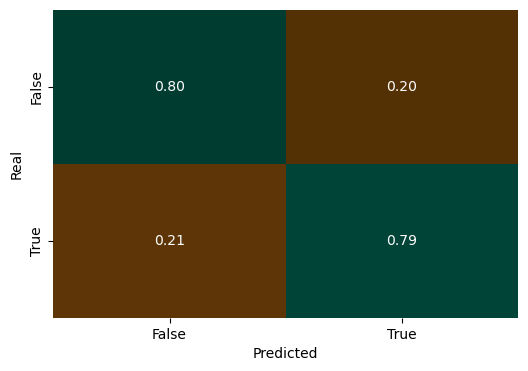

In [110]:
#Plotting Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, fmt='.2f', annot = True, cmap = "BrBG", cbar=False)

As observed from the confusion matrix, 79% of actual churned class is predicted correctly and 21% of actually churned data is predicted as not churned which is a good result.

**Gain Chart**

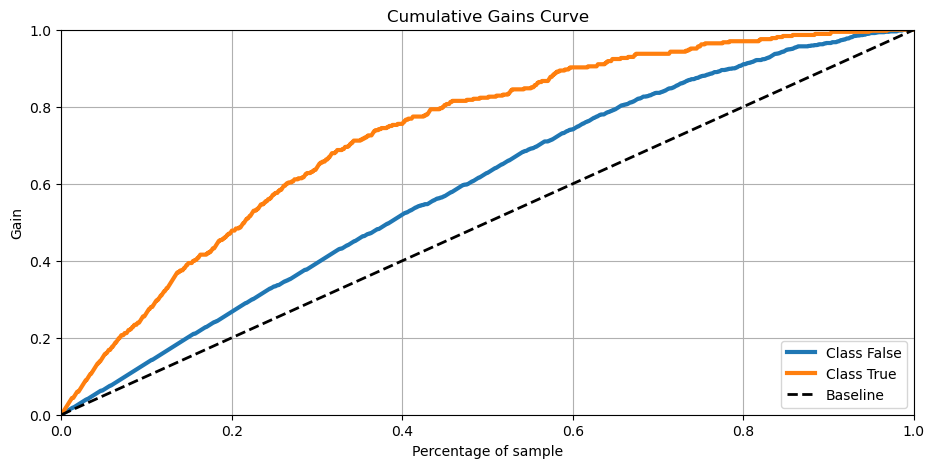

In [111]:
# The usual train-test split mumbo-jumbo
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X1_train, y1_train)
predicted_probas1 = nb.predict_proba(X1_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y1_test, predicted_probas1)
plt.show()

**Analysing the SMOTE results**

The F1 score for baseline model and SMOTE model are the same which is 72%.
Comparing the baseline mdoel, the precision for SMOTE model reduced to 64% from 77%.
The Recall however increased from 75% to 79% which tells us that churned class prediction has improved by 4%.
The incorrect prediction of actual churn as not-churned reduced from 28% to 21% which is a remarkable improvement as well.
The gain chart area is bigger but not as great as baseline model.

**Performance Comparison**

In [112]:
f1 = pd.DataFrame.from_records({'Baseline':[f1], 'Hypertuned':[f_score], 'SMOTE': [f2]})
precision = pd.DataFrame.from_dict({'Baseline':[precision], 'Hypertuned':[prec], 'SMOTE': [precision1]})
recall = pd.DataFrame.from_dict({'Baseline':[recall], 'Hypertuned':[rec], 'SMOTE': [recall1]})

Maximum scores


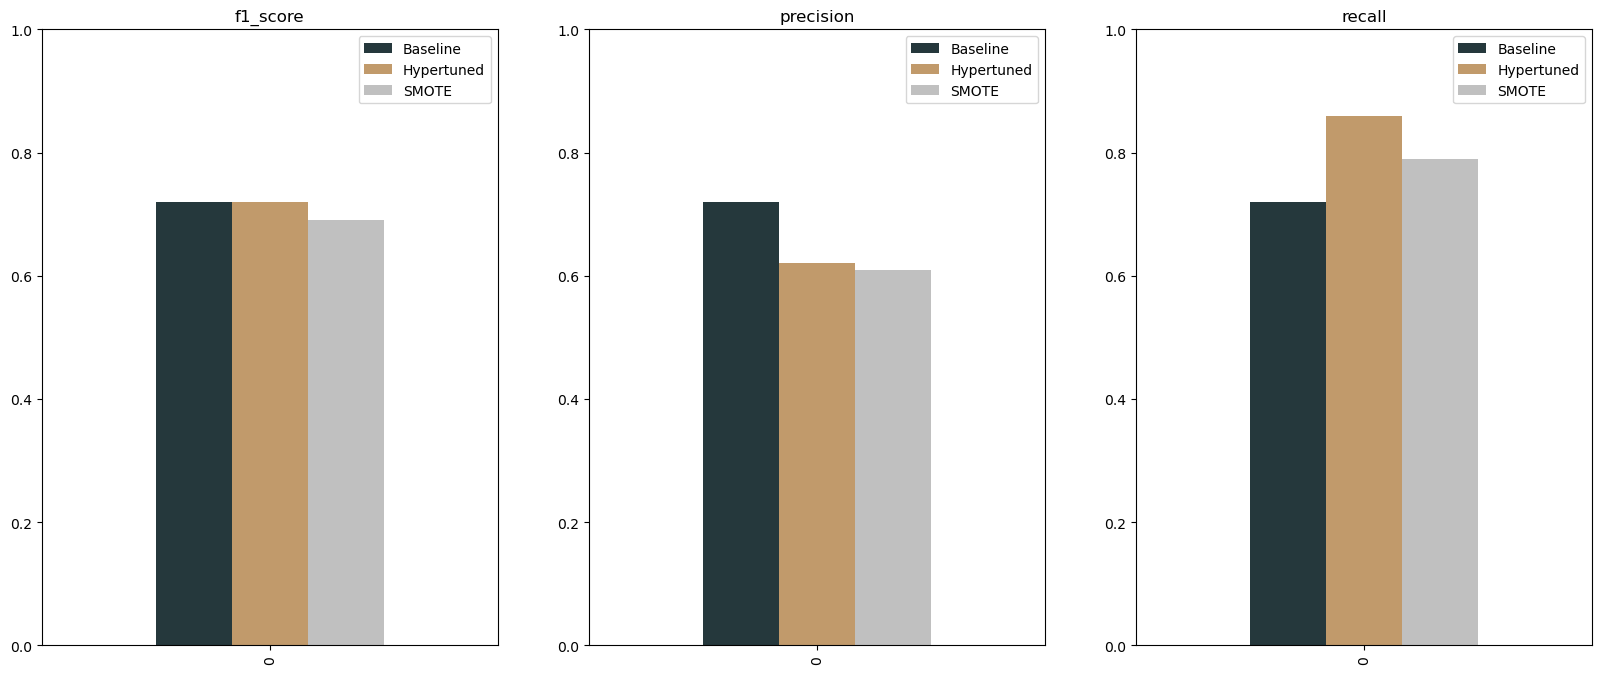

In [113]:
fig,axes = plt.subplots(1,3,figsize=(20,8))


custom_colors = ['#25383C', '#C19A6B', '#C0C0C0']

#f1 plot
axes.flat[0].set_title('f1_score')
f1.plot.bar(ax=axes.flat[0], color=custom_colors);
axes.flat[0].set_ylim(0, 1)

#precision plot
axes.flat[1].set_title('precision')
precision.plot.bar(ax=axes.flat[1], color=custom_colors);
axes.flat[1].set_ylim(0, 1)

#recall plot
axes.flat[2].set_title('recall')
recall.plot.bar(ax=axes.flat[2], color=custom_colors);
axes.flat[2].set_ylim(0, 1)

print('Maximum scores')
#pd.concat([f1.idxmax().rename('model'),f1.max().rename('f1'),precision.idxmax().rename('model'),precision.max().rename('precision'),recall.idxmax().rename('model'),recall.max().rename('recall')],axis=1)


Looking at the plot, baseline model has a balanced f1_score, precision and recall.